## 🫀 Project Title:
Heart Disease Prediction using Machine Learning and Ensemble Models


**About Heart disease**:
Heart Disease (including Coronary Heart Disease, Hypertension, and Stroke) remains the No. 1 cause of death in the US.The Heart Disease and Stroke Statistics—2019 Update from the American Heart Association indicates that:

1. 116.4 million, or 46% of US adults are estimated to have hypertension. These are findings related to the new 2017 Hypertension Clinical Practice Guidelines.
2. On average, someone dies of CVD every 38 seconds. About 2,303 deaths from CVD each day, based on 2016 data.
3. On average, someone dies of a stroke every 3.70 minutes. About 389.4 deaths from stroke each day, based on 2016 data.

**Objective:**
The primary objective of this project was to develop and compare three different machine learning models -  Logistic Regression,Decision Tree,Extra Trees Classifier,Random Forest,SVM,K-Nearest Neighbors classifier,Gradient Boosting Classifier,eXtreme Gradient Boost & Hybrid ( Ensemble Model 1-Logistic Regression,Decision Tree,Extra Trees Classifier, Ensemble Model 2-Random Forest,SVM,K-Nearest Neighbors classifier, Ensemble Model 3-Gradient Boosting Classifier,eXtreme Gradient Boost,Ada-Boost Classifier, Multi-Layer Perceptron)for predicting heart disease. The goal was to assess the performance of these models in terms of accuracy, precision, recall, and F1-score in order to identify the best-performing model for heart disease prediction.



Project Overview:
In this Project I will try to unleash useful insights using this heart disease datasets and will perform feature selection to build Soft Voting Ensemble model by combining the power of best performing machine learning algorithms.

This Project is divided into 18 major steps which are as follows:

   1.Data description
   
   2.Importing Libraries & setting up environment
   
   3.Loading Dataset
   
   4.Balance Data

   5.Convert Fuzzy Value into Binary(0 & 1)
   
   6.Data Analysis
   
   7.Data Cleaning & Preprocessing
   
   8.Exploratory Data Analysis
   
   9.Correlation
   
   10.Separating Independend Columns From Target Columns
   
  11.Scaling Data

  12.Splitting Train & Test Data

  13.Model Building ( Logistic Regression, Decision Tree Classifier & Random Forest Classifier )

  14.Model Comparison

  15.Model Evaluation

  16.Cross Validation

  17.ROC_AUC Cruve

  18.Learing Curve

  19.Conclusion


**Dataset Description:**

**Features (independent variables):**

**Age:** Patients Age in years (Numeric)

**Sex:** Gender of patient (Male - 1, Female - 0) (Nominal)

**Chest Pain Type:** Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non- anginal pain, asymptomatic (Nominal)

**resting bp s:** Level of blood pressure at resting mode in mm/HG (Numerical)

**cholestrol:** Serum cholestrol in mg/dl (Numeric)

**fasting blood sugar:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)

**resting ecg:** Result of electrocardiogram while at rest are represented in 3
distinct values 0 :Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)

**thalach:** maximum heart rate achieved(Numeric).

**exercise angina:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal).

**oldpeak:** Exercise induced ST-depression in comparison with the state of rest (Numeric).

**ca:** number of major vessels (0–3) colored by fluoroscope.

**slope:** ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal) target variable.

**thal:** 3 = normal; 6 = fixed defect; 7 = reversible defect.

**Smoking:** Smoker (0.6), Non-smoker (0.4).[Convert 0.6 & 0.4 to 1 & 0]

**Stress Level:** Low (0.3), High (0.7).[Convert 0.7 & 0.3 to 1 & 0]

**Family History:** Positive (0.7), Negative (0.3).[Convert 0.7 & 0.3 to 1 & 0]


**Target (dependent variable):**

**target:** It is the target variable which we have to predict 0=low risk of heart attack, 1=high risk of heart attack.

As we can see from the output above, This dataset contains 16 features and 1 target variable.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

## Data Load

In [37]:
import pandas as pd

# Assuming your datasets are in CSV files
df1 = pd.read_csv('/content/drive/MyDrive/AI LAB/heart1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/AI LAB/heart2.csv')
merged_dataset_path = '/content/drive/MyDrive/AI LAB/heart_disease_merged.csv'

# Merge the datasets based on the 'Age' column and specify suffixes for overlapping columns

merged_df = pd.merge(df1, df2, on=['Age', 'target'], how='inner', suffixes=('_df1', '_df2'))

# Print the merged DataFrame
print(merged_df)

# Save the merged DataFrame to a CSV file
merged_df.to_csv(merged_dataset_path, index=False)


      Age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      52    1   0       125   212    0        1      168      0      1.0   
2      52    1   0       125   212    0        1      168      0      1.0   
3      53    1   0       140   203    1        0      155      1      3.1   
4      53    1   0       140   203    1        0      155      1      3.1   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
9809   54    1   0       120   188    0        1      113      0      1.4   
9810   54    1   0       120   188    0        1      113      0      1.4   
9811   54    1   0       120   188    0        1      113      0      1.4   
9812   54    1   0       120   188    0        1      113      0      1.4   
9813   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  Smoking  Stress Level  Family History  
0   

The 9814 in the output defines the number of records in the dataset and 17 defines the number of features in the dataset including the ‘target variable’.So, we see that this dataset are imbalance data.Because df1 has 1025 row & 14 columns & df2 has 500 row & 5 columns.It begins by merging two datasets based on the 'Age' column.

In [38]:
merged_df.shape
merged_df

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Smoking,Stress Level,Family History
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.6,0.7,0.3
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.4,0.7,0.3
2,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.4,0.7,0.7
3,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.4,0.3,0.7
4,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.6,0.3,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,0.6,0.7,0.7
9810,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,0.4,0.7,0.3
9811,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,0.4,0.7,0.7
9812,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,0.4,0.7,0.3


## Balance Data

The provided Python code balances a heart disease dataset by ensuring an equal representation of positive (target=1) and negative (target=0) instances. Using the 'Age' and 'target' columns, it merges two datasets, undersamples each class to achieve 1000 instances, and rearranges columns for clarity. The resulting balanced dataset is saved to 'heart_disease_merged.csv'. This process addresses class imbalance, enhancing the model's training effectiveness for heart disease prediction. The code emphasizes precision in balancing, ensuring exactly 1000 samples for both classes, with the 'Age' column as the first and 'target' as the last.

In [39]:
import pandas as pd

# Assuming your datasets are in CSV files
df1 = pd.read_csv('/content/drive/MyDrive/AI LAB/heart1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/AI LAB/heart2.csv')
merged_dataset_path = '/content/drive/MyDrive/AI LAB/heart_disease_merged.csv'

# Merge the datasets based on the 'Age' and 'target' columns, and specify suffixes for overlapping columns
merged_df = pd.merge(df1, df2, on=['Age', 'target'], how='inner', suffixes=('_df1', '_df2'))

# Convert categorical features to binary (0 and 1)
merged_df['Smoking'] = pd.get_dummies(merged_df['Smoking'], drop_first=True)
merged_df['Stress Level'] = pd.get_dummies(merged_df['Stress Level'], drop_first=True)
merged_df['Family History'] = pd.get_dummies(merged_df['Family History'], drop_first=True)

# Set the correct target column name in the following line
target_column = 'target'

# Set the desired number of samples for each class after balancing
desired_samples = 1000

# Separate the majority and minority classes
minority_class = merged_df[merged_df[target_column] == 1]
majority_class = merged_df[merged_df[target_column] == 0]

# Sample a fixed number of instances from each class
balance_minority_class = minority_class.sample(n=desired_samples, replace=True, random_state=42)
balance_majority_class = majority_class.sample(n=desired_samples, replace=True, random_state=42)

# Combine the undersampled majority class and the minority class
balanced_df = pd.concat([balance_majority_class, balance_minority_class])

# Shuffle the dataset to randomize the order of samples
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Rearrange columns so that 'Age' is the first column and 'target' is the last column
column_order = ['Age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Smoking', 'Stress Level', 'Family History', 'target']

balanced_df = balanced_df[column_order]

# Save the balanced dataset to a new CSV file
balanced_df.to_csv(merged_dataset_path, index=False)

# Check the class distribution in the target column after balancing
print("\nClass distribution after balancing:")
print(balanced_df[target_column].value_counts())



Class distribution after balancing:
target
1    1000
0    1000
Name: count, dtype: int64


In [40]:
balanced_df

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Smoking,Stress Level,Family History,target
0,51,1,2,100,222,0,1,143,1,1.2,1,0,2,False,False,False,1
1,63,0,0,124,197,0,1,136,1,0.0,1,0,2,False,False,False,0
2,45,1,0,115,260,0,0,185,0,0.0,2,0,2,True,False,True,1
3,67,1,2,152,212,0,0,150,0,0.8,1,0,3,False,True,True,0
4,66,0,3,150,226,0,1,114,0,2.6,0,0,2,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,55,0,1,135,250,0,0,161,0,1.4,1,0,2,False,False,False,1
1996,66,1,0,160,228,0,0,138,0,2.3,2,0,1,False,False,True,1
1997,60,1,0,125,258,0,0,141,1,2.8,1,1,3,False,False,False,0
1998,52,1,2,172,199,1,1,162,0,0.5,2,0,3,False,True,False,1


## Data Analysis

In [ ]:
#checking first five rows by calling df.head()
balanced_df.head()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Smoking,Stress Level,Family History,target
0,51,1,2,100,222,0,1,143,1,1.2,1,0,2,False,False,False,1
1,63,0,0,124,197,0,1,136,1,0.0,1,0,2,False,False,False,0
2,45,1,0,115,260,0,0,185,0,0.0,2,0,2,True,False,True,1
3,67,1,2,152,212,0,0,150,0,0.8,1,0,3,False,True,True,0
4,66,0,3,150,226,0,1,114,0,2.6,0,0,2,False,False,True,1


In [ ]:
#checking last five rows by calling df.tail()
balanced_df.tail()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Smoking,Stress Level,Family History,target
1995,55,0,1,135,250,0,0,161,0,1.4,1,0,2,False,False,False,1
1996,66,1,0,160,228,0,0,138,0,2.3,2,0,1,False,False,True,1
1997,60,1,0,125,258,0,0,141,1,2.8,1,1,3,False,False,False,0
1998,52,1,2,172,199,1,1,162,0,0.5,2,0,3,False,True,False,1
1999,66,0,2,146,278,0,0,152,0,0.0,1,1,2,False,False,False,1


In [ ]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2000 non-null   int64  
 1   sex             2000 non-null   int64  
 2   cp              2000 non-null   int64  
 3   trestbps        2000 non-null   int64  
 4   chol            2000 non-null   int64  
 5   fbs             2000 non-null   int64  
 6   restecg         2000 non-null   int64  
 7   thalach         2000 non-null   int64  
 8   exang           2000 non-null   int64  
 9   oldpeak         2000 non-null   float64
 10  slope           2000 non-null   int64  
 11  ca              2000 non-null   int64  
 12  thal            2000 non-null   int64  
 13  Smoking         2000 non-null   bool   
 14  Stress Level    2000 non-null   bool   
 15  Family History  2000 non-null   bool   
 16  target          2000 non-null   int64  
dtypes: bool(3), float64(1), int64(13)

The "uint8" data type typically represents unsigned 8-bit integers, which are integers ranging from 0 to 255. This data type is often used for binary flags or categorical variables with a small number of possible values. Similarly, the "int64" and "float64" data types represent 64-bit integers and floating-point numbers, respectively.

In [ ]:
balanced_df.isnull().values.any()

np.False_

As we can see here, the output is False, which means our dataset has no missing values.

In [ ]:
balanced_df.isna().sum()

,0
Age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Total number of rows with missing values is 0.

In [ ]:
#check statistics
balanced_df.describe().style.background_gradient(cmap='Oranges')

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,54.655000,0.697500,0.949000,131.350500,248.558500,0.160000,0.503500,148.718500,0.335000,1.084200,1.361000,0.794500,2.328500,0.500000
std,7.619646,0.459455,1.020255,17.896027,50.800462,0.366698,0.531158,22.983851,0.472109,1.194790,0.634729,1.002882,0.637802,0.500125
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,0.000000,120.000000,215.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,130.000000,242.000000,0.000000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.500000
75%,59.000000,1.000000,2.000000,140.000000,283.000000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


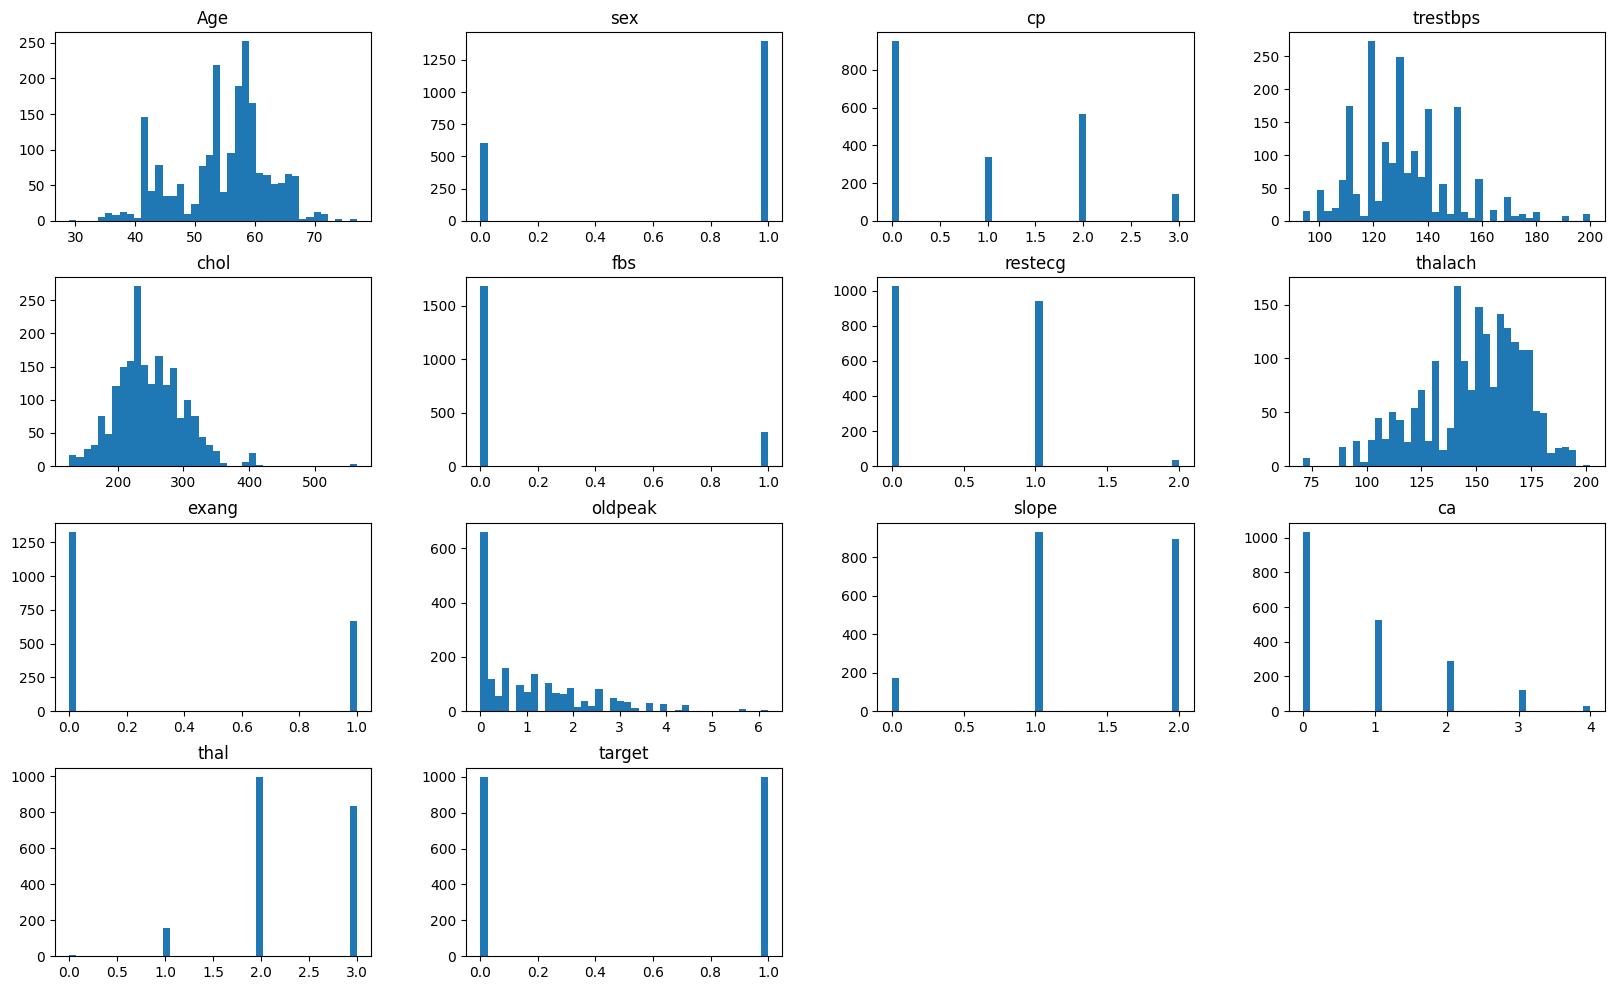

In [ ]:
#check numeric value
balanced_df.hist(bins = 40, grid = False, figsize = (20,12));

## Data Cleaning

In [ ]:
# Remove columns from merged_df
balanced_df = balanced_df.drop(['trestbps', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca'], axis=1)
balanced_df.head()

,Age,sex,cp,chol,fbs,thal,Smoking,Stress Level,Family History,target
0,51,1,2,222,0,2,False,False,False,1
1,63,0,0,197,0,2,False,False,False,0
2,45,1,0,260,0,2,True,False,True,1
3,67,1,2,212,0,3,False,True,True,0
4,66,0,3,226,0,2,False,False,True,1


In [ ]:
balanced_df.shape

(2000, 10)

In [ ]:
#after removing unwanted cloumns check statistics
balanced_df.describe().style.background_gradient(cmap='Oranges')

,Age,sex,cp,chol,fbs,thal,target
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,54.655000,0.697500,0.949000,248.558500,0.160000,2.328500,0.500000
std,7.619646,0.459455,1.020255,50.800462,0.366698,0.637802,0.500125
min,29.000000,0.000000,0.000000,126.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,0.000000,215.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,242.000000,0.000000,2.000000,0.500000
75%,59.000000,1.000000,2.000000,283.000000,0.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,564.000000,1.000000,3.000000,1.000000


In [ ]:
balanced_df.isna().sum()

,0
Age,0
sex,0
cp,0
chol,0
fbs,0
thal,0
Smoking,0
Stress Level,0
Family History,0
target,0


## Check Duplicate Values

In [ ]:
#check duplicate values
df_dup =  balanced_df.duplicated().any()
df_dup

np.True_

As we can see here, the output is True, which means our dataset has some duplicate values. So let’s drop them.

In [ ]:
#drop duplicate values
balanced_df= balanced_df.drop_duplicates()

In [ ]:
#check for the duplicated values once again
df_dup = balanced_df.duplicated().any()
df_dup

np.False_

As we can see here, the output is False, which means our dataset becomes free from duplicated values.

In [ ]:
balanced_df.shape

(968, 10)

## Exploratory Data Analysis(EDA)

In [ ]:
#check people have heart disease & people does not have heart disease
balanced_df.target.value_counts()

target
1    497
0    463
Name: count, dtype: int64

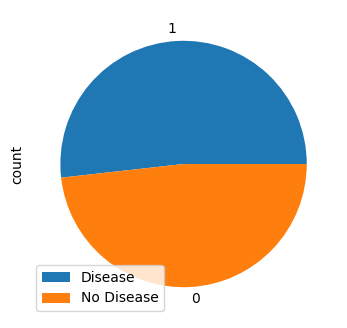

In [ ]:
balanced_df.target.value_counts().plot(kind = 'pie', figsize = (6,4))
plt.legend(["Disease", "No Disease"]);

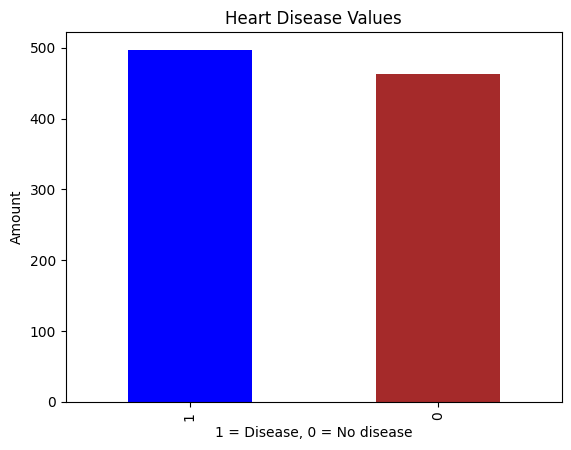

In [ ]:
import matplotlib.pyplot as plt
balanced_df.target.value_counts().plot(kind = 'bar', color = ['blue', 'brown'])
plt.title("Heart Disease Values")
plt.xlabel("1 = Disease, 0 = No disease")
plt.ylabel("Amount");

The dataset is balanced having 497 heart disease patients and 463 no heart disease patients

In [ ]:
#check which sex has most heart disease
balanced_df.sex.value_counts()

sex
1    665
0    295
Name: count, dtype: int64

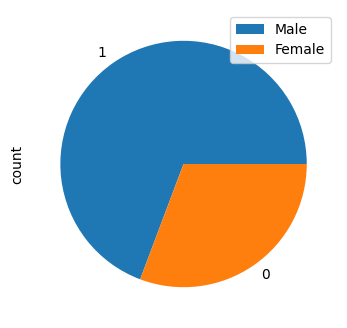

In [ ]:
balanced_df.sex.value_counts().plot(kind = 'pie', figsize = (6,4))
plt.legend(["Male", "Female"]);

As we can see from above plot, in this dataset males percentage is way too higher than females where male patients is 655 & female patients is 295.

In [ ]:
pd.crosstab(balanced_df.sex, balanced_df.target)

target,0,1
sex,,
0,93,202
1,370,295


In [ ]:
#check which sex has which type of chest pain most
balanced_df.cp.value_counts()

cp
0    468
2    268
1    167
3     57
Name: count, dtype: int64

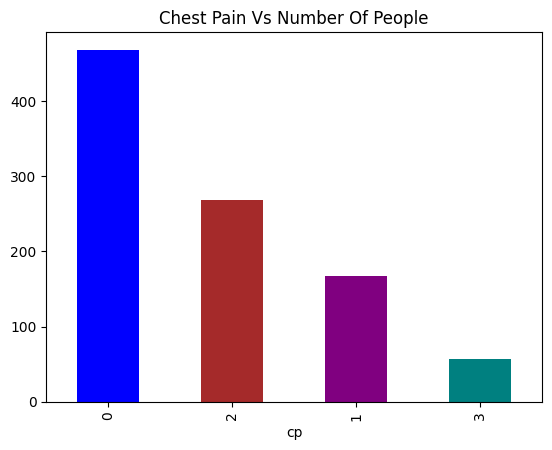

In [ ]:
balanced_df.cp.value_counts().plot(kind = 'bar', color = ['blue', 'brown', 'purple', 'teal'])
plt.title("Chest Pain Vs Number Of People");

In [ ]:
pd.crosstab(balanced_df.sex, balanced_df.cp)

cp,0,1,2,3
sex,,,,
0,125,59,103,8
1,343,108,165,49


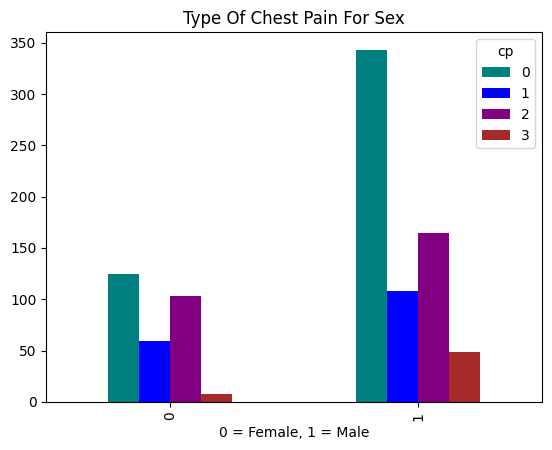

In [ ]:
pd.crosstab(balanced_df.sex, balanced_df.cp).plot(kind = 'bar', color = ['teal', 'blue', 'purple', 'brown'])
plt.title("Type Of Chest Pain For Sex")
plt.xlabel('0 = Female, 1 = Male');

In [ ]:
#check which chest pain are most pron to have heart disease
pd.crosstab(balanced_df.cp, balanced_df.target)

target,0,1
cp,,
0,352,116
1,41,126
2,53,215
3,17,40


**Correlation**

Correlation is a statistical measure that quantifies the relationship between two variables.Correlation can be used to select relevent features for models.

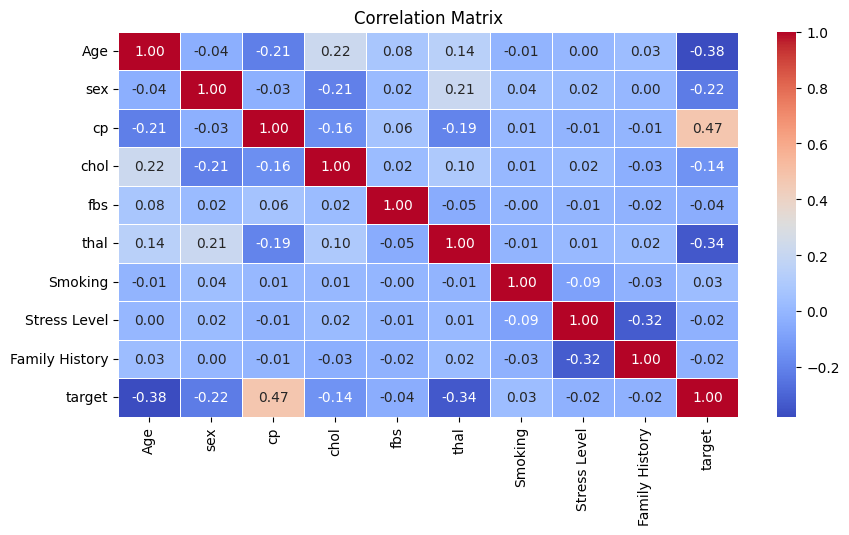

In [ ]:
import seaborn as sns

correlation=balanced_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Separating Independend Columns From Target Columns**

In [ ]:
#Select all rows and every other column
x = balanced_df.iloc[:,0:9]
y = balanced_df.iloc[:,-1]
x

,Age,sex,cp,chol,fbs,thal,Smoking,Stress Level,Family History
0,51,1,2,222,0,2,False,False,False
1,63,0,0,197,0,2,False,False,False
2,45,1,0,260,0,2,True,False,True
3,67,1,2,212,0,3,False,True,True
4,66,0,3,226,0,2,False,False,True
...,...,...,...,...,...,...,...,...,...
1988,56,1,1,236,0,2,True,True,True
1991,51,1,0,261,0,2,True,True,True
1992,41,0,1,198,0,2,True,False,True
1994,44,1,2,235,0,2,True,False,True


In [ ]:
y

,target
0,1
1,0
2,1
3,0
4,1
...,...
1988,1
1991,1
1992,1
1994,1


## Scaling Data

Scaling data is the process of adjusting values within a specific range, typically between 0 and 1, to facilitate meaningful comparisons and analysis.

In [ ]:
#scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features
balanced_df.head()

,Age,sex,cp,chol,fbs,thal,Smoking,Stress Level,Family History,target
0,51,1,2,222,0,2,False,False,False,1
1,63,0,0,197,0,2,False,False,False,0
2,45,1,0,260,0,2,True,False,True,1
3,67,1,2,212,0,3,False,True,True,0
4,66,0,3,226,0,2,False,False,True,1


We scale the data so that when feeding the data into the machine learning model it will be uniform which also positively impacts our model accuracy.

## Splitting Train & Test Data

We will split our dataset into two sets: one set for training and one for testing. I split the dataset into 80% training data and 20% testing data.Train the model on the training set. Test the model on the testing set, and evaluate how well we did.


In [ ]:
X=balanced_df.drop('target',axis=1)
y=balanced_df.target

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

MODEL

## 1.Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.Predicts binary outcomes (0 or 1) based on input variables.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1, solver='lbfgs', max_iter=500, random_state=11)
lr.fit(X_train, y_train)


LogisticRegression(C=1, max_iter=500, random_state=11)

In [ ]:
#Training Score
lr.score(X_train, y_train)

0.7829457364341085

In [ ]:
# Testing accuracy
lr.score(X_test, y_test)


0.7783505154639175

In [ ]:
#Prediction of the test variable
y_pred1 = lr.predict(X_test)
y_pred1

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

## 2.Decision Tree

A decision tree is a hierarchical model representing choices and their possible consequences, used in decision analysis and machine learning.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=10, random_state=11)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=10,
                       random_state=11)

In [ ]:
#Training Score
dt.score(X_train, y_train)

0.7751937984496124

In [ ]:
#Testing accuracy
dt.score(X_test, y_test)

0.7371134020618557

In [ ]:
#Prediction of the test variable
y_pred2 = dt.predict(X_test)
y_pred2

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

##  3.Extra Trees Classifier (ET)

ET is an ensemble learning method for classification, similar to Random Forest but with random splits.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Create an instance of Extra Trees Classifier
et = ExtraTreesClassifier(n_estimators=100, max_depth=3, min_samples_leaf=10,random_state=11)

# Fit the Extra Trees Classifier to the training data
et.fit(X_train, y_train)


ExtraTreesClassifier(max_depth=3, min_samples_leaf=10, random_state=11)

In [ ]:
# Training Score
et.score(X_train, y_train)

0.8255813953488372

In [ ]:
# Testing accuracy
et.score(X_test, y_test)

0.8247422680412371

In [ ]:
# Prediction of the test variable
y_pred3 = et.predict(X_test)
y_pred3

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

## 4.Random Forest

Random forest classifier is a supervised machine learning algorithm which can be used for both classification and regression tasks. RFC is considered to be flexible and easy to use due to its straight forward implementation.

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=10,random_state=11)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, random_state=11)

In [ ]:
#Training Score
rf.score(X_train, y_train)

0.8255813953488372

In [ ]:
#Testing accuracy
rf.score(X_test, y_test)

0.8041237113402062

In [ ]:
#Prediction of the test variable
y_pred4 = rf.predict(X_test)
y_pred4

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

## 5.Support Vector Machine

A supervised machine learning algorithm used for classification and regression tasks, finding optimal hyperplanes to separate data points.

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
# Training Score
svm_training_score = svm.score(X_train, y_train)
print("Training Score:", svm_training_score)

Training Score: 0.6382428940568475


In [ ]:
# Testing accuracy
svm_testing_score = svm.score(X_test, y_test)
print("Testing accuracy:", svm_testing_score)

Testing accuracy: 0.6494845360824743


In [ ]:
# Prediction of the test variable
y_pred5= svm.predict(X_test)
y_pred5

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

## 6.K-Nearest Neighbors classifier

A simple algorithm that classifies data points based on the majority class among their k nearest neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Training Score
knn_training_score = knn.score(X_train, y_train)
print("Training Score (KNN):", knn_training_score)

Training Score (KNN): 0.8979328165374677


In [ ]:
# Testing accuracy
knn_testing_score = knn.score(X_test, y_test)
print("Testing accuracy (KNN):", knn_testing_score)

Testing accuracy (KNN): 0.8298969072164949


In [ ]:
# Prediction of the test variable using KNN
y_pred6 = knn.predict(X_test)
y_pred6

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

## 7.Gradient Boosting Classifier

Gradient Boosting Classifier is a machine learning algorithm that builds an ensemble of decision trees sequentially, each correcting errors of its predecessor, minimizing loss.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [ ]:
# Train the Gradient Boosting classifier
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Training Score
gb_training_score = gb_classifier.score(X_train, y_train)
print("Training Score:", gb_training_score)

Training Score: 0.9638242894056848


In [ ]:
# Testing accuracy
gb_testing_score = gb_classifier.score(X_test, y_test)
print("Testing accuracy:", gb_testing_score)

Testing accuracy: 0.9278350515463918


In [ ]:
# Assuming gb_classifier is already trained
y_pred7 = gb_classifier.predict(X_test)
y_pred7


array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

## 8.eXtreme Gradient Boost (XGB)

XGBoost is a powerful gradient boosting algorithm for classification and regression tasks.


In [ ]:
from xgboost import XGBClassifier

# Create XGBoost classifier
xgb = XGBClassifier()

# Train the model
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Training Score
xgb.score(X_train, y_train)

1.0

In [ ]:
# Testing accuracy
xgb.score(X_test, y_test)

0.9845360824742269

In [ ]:
# Prediction of the test variable
y_pred8 = xgb.predict(X_test)
y_pred8

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

## Model Comparison

In [ ]:
import pandas as pd


model_names = ['Logistic Regression', 'Decision Tree', 'Extra Trees Classifier', 'Random Forest', 'SVM', 'K-Nearest Neighbors', 'Gradient Boosting', 'eXtreme Gradient Boost']
accuracy_scores = [
    accuracy_score(y_test, y_pred1),
    accuracy_score(y_test, y_pred2),
    accuracy_score(y_test, y_pred3),
    accuracy_score(y_test, y_pred4),
    accuracy_score(y_test, y_pred5),
    accuracy_score(y_test, y_pred6),
    accuracy_score(y_test, y_pred7),
    accuracy_score(y_test, y_pred8)
]

final_data = pd.DataFrame({'Models': model_names, 'Accuracy': accuracy_scores})
print(final_data)


                   Models  Accuracy
0     Logistic Regression  0.778351
1           Decision Tree  0.737113
2  Extra Trees Classifier  0.824742
3           Random Forest  0.804124
4                     SVM  0.649485
5     K-Nearest Neighbors  0.829897
6       Gradient Boosting  0.927835
7  eXtreme Gradient Boost  0.984536


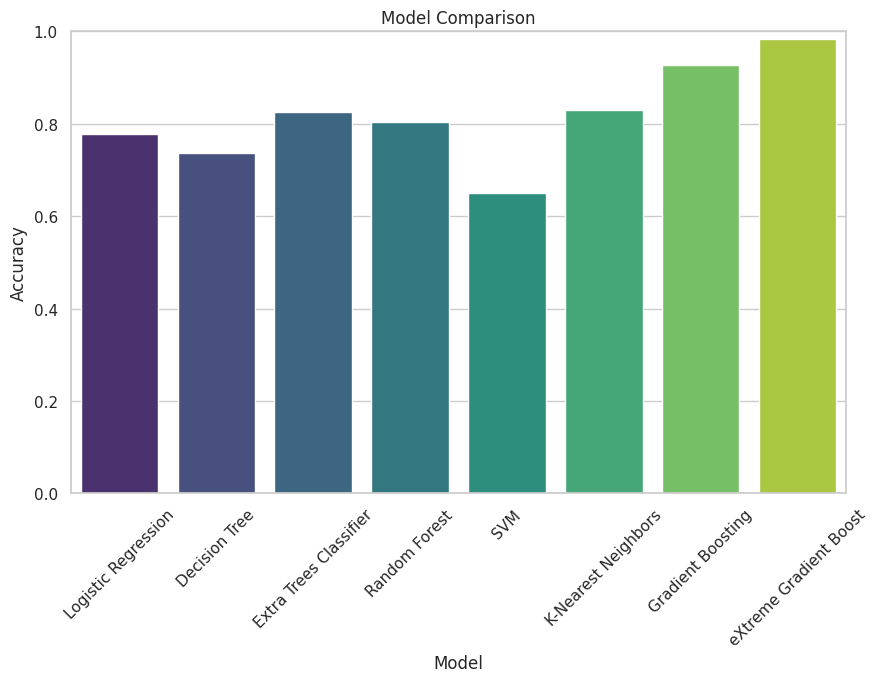

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Extra Trees Classifier', 'Random Forest', 'SVM', 'K-Nearest Neighbors', 'Gradient Boosting', 'eXtreme Gradient Boost']
accuracies = [
    accuracy_score(y_test, y_pred1),
    accuracy_score(y_test, y_pred2),
    accuracy_score(y_test, y_pred3),
    accuracy_score(y_test, y_pred4),
    accuracy_score(y_test, y_pred5),
    accuracy_score(y_test, y_pred6),
    accuracy_score(y_test, y_pred7),
    accuracy_score(y_test, y_pred8)
]


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette="viridis", dodge=False, legend=False)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Set the y-axis limit between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

## Evaluate the Model

## 1.Logistic Regression

In [ ]:
# Make predictions on the test datas
y_pred1 = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test,y_pred1)
confusion = confusion_matrix(y_test, y_pred1)
classification_rep = classification_report(y_test,y_pred1)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7783505154639175
Confusion Matrix:
 [[77 20]
 [23 74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78        97
           1       0.79      0.76      0.77        97

    accuracy                           0.78       194
   macro avg       0.78      0.78      0.78       194
weighted avg       0.78      0.78      0.78       194



## 2.Decision Tree

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
confusion = confusion_matrix(y_test, y_pred2)
classification_rep = classification_report(y_test, y_pred2)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7371134020618557
Confusion Matrix:
 [[92  5]
 [46 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.95      0.78        97
           1       0.91      0.53      0.67        97

    accuracy                           0.74       194
   macro avg       0.79      0.74      0.72       194
weighted avg       0.79      0.74      0.72       194



## 3.Extra Trees Classifier

In [ ]:
#Make predictions on the test datas
y_pred3 = et.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test,y_pred3)
confusion = confusion_matrix(y_test, y_pred3)
classification_rep = classification_report(y_test,y_pred3)

#Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8247422680412371
Confusion Matrix:
 [[79 18]
 [16 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        97
           1       0.82      0.84      0.83        97

    accuracy                           0.82       194
   macro avg       0.82      0.82      0.82       194
weighted avg       0.82      0.82      0.82       194



## 4.Random Forest Classifier

In [ ]:
# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred4 = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred4)
confusion = confusion_matrix(y_test, y_pred4)
classification_rep = classification_report(y_test, y_pred4)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8041237113402062
Confusion Matrix:
 [[80 17]
 [21 76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        97
           1       0.82      0.78      0.80        97

    accuracy                           0.80       194
   macro avg       0.80      0.80      0.80       194
weighted avg       0.80      0.80      0.80       194



## 5.Support Vector Machine.

In [ ]:
# Train the model
svm.fit(X_train, y_train)
#Make predictions on the test datas
y_pred5= svm.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test,y_pred5)
confusion = confusion_matrix(y_test, y_pred5)
classification_rep = classification_report(y_test,y_pred5)

#Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6494845360824743
Confusion Matrix:
 [[61 36]
 [32 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.63      0.64        97
           1       0.64      0.67      0.66        97

    accuracy                           0.65       194
   macro avg       0.65      0.65      0.65       194
weighted avg       0.65      0.65      0.65       194



## 6.K-Nearest Neighbors classifier

In [ ]:
# Train the model
knn.fit(X_train, y_train)
#Make predictions on the test datas
y_pred6= knn.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test,y_pred6)
confusion = confusion_matrix(y_test, y_pred6)
classification_rep = classification_report(y_test,y_pred6)

#Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8298969072164949
Confusion Matrix:
 [[83 14]
 [19 78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        97
           1       0.85      0.80      0.83        97

    accuracy                           0.83       194
   macro avg       0.83      0.83      0.83       194
weighted avg       0.83      0.83      0.83       194



## 7.Gradient Boosting Classifier

In [ ]:
# Train the Gradient Boosting classifier
gb_classifier.fit(X_train, y_train)

#Make predictions on the test datas
y_pred7= gb_classifier.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test,y_pred7)
confusion = confusion_matrix(y_test, y_pred7)
classification_rep = classification_report(y_test,y_pred7)

#Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9278350515463918
Confusion Matrix:
 [[94  3]
 [11 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        97
           1       0.97      0.89      0.92        97

    accuracy                           0.93       194
   macro avg       0.93      0.93      0.93       194
weighted avg       0.93      0.93      0.93       194



## 8.eXtreme Gradient Boost (XGB)


In [ ]:
import xgboost as xgb

# Define and train the XGB classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred8 = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred8)
confusion_xgb = confusion_matrix(y_test, y_pred8)
classification_rep_xgb = classification_report(y_test, y_pred8)

# Print the evaluation results
print(f"Accuracy: {accuracy_xgb}")
print("Confusion Matrix:\n", confusion_xgb)
print("Classification Report:\n", classification_rep_xgb)


Accuracy: 0.9845360824742269
Confusion Matrix:
 [[97  0]
 [ 3 94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        97
           1       1.00      0.97      0.98        97

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



## Cross Validation


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'eXtreme Gradient Boost': XGBClassifier(eval_metric='logloss')
}

# Split data once for consistency across models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each classifier
for clf_name, clf in classifiers.items():
    # Cross-validation
    cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)

    # Train and predict
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"{clf_name}")
    print(f"  CV Accuracy Scores: {cv_scores}")
    print(f"  Mean CV Accuracy  : {mean_accuracy:.4f}")
    print(f"  Test Set Accuracy : {test_accuracy:.4f}\n")




Logistic Regression
  CV Accuracy Scores: [0.8556701  0.74742268 0.76804124 0.75129534 0.75647668]
  Mean CV Accuracy  : 0.7758
  Test Set Accuracy : 0.8093

Decision Tree
  CV Accuracy Scores: [0.96907216 0.98969072 0.98453608 0.98445596 0.98445596]
  Mean CV Accuracy  : 0.9824
  Test Set Accuracy : 0.9588

Extra Trees Classifier
  CV Accuracy Scores: [0.91752577 0.87628866 0.92268041 0.86528497 0.86010363]
  Mean CV Accuracy  : 0.8884
  Test Set Accuracy : 0.9021

Random Forest
  CV Accuracy Scores: [0.95876289 0.95360825 0.94845361 0.91709845 0.94300518]
  Mean CV Accuracy  : 0.9442
  Test Set Accuracy : 0.9794

SVM
  CV Accuracy Scores: [0.67010309 0.72164948 0.63402062 0.67875648 0.54404145]
  Mean CV Accuracy  : 0.6497
  Test Set Accuracy : 0.6495

K-Nearest Neighbors
  CV Accuracy Scores: [0.81443299 0.81443299 0.86082474 0.83937824 0.79792746]
  Mean CV Accuracy  : 0.8254
  Test Set Accuracy : 0.7784

Gradient Boosting
  CV Accuracy Scores: [0.94329897 0.91752577 0.93298969 0.9

## Hybrid

An entity or object combining elements from two distinct sources or types, often resulting in a blend of characteristics or functionalities.

1. LogisticRegression,DecisionTreeClassifier & ExtraTreesClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

# Define base models
logistic_regression = LogisticRegression(C=1, solver='lbfgs', max_iter=500, random_state=11)
decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=10, random_state=11)
extra_trees = ExtraTreesClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10, random_state=11)

# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[('lr', logistic_regression), ('dt', decision_tree), ('et', extra_trees)],
    voting='hard')  # 'hard' voting takes the majority of votes

# Train the ensemble model
ensemble_model.fit(X_train, y_train)



VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, max_iter=500,
                                                 random_state=11)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=2,
                                                     min_samples_leaf=5,
                                                     min_samples_split=10,
                                                     random_state=11)),
                             ('et',
                              ExtraTreesClassifier(max_depth=3,
                                                   min_samples_leaf=5,
                                                   min_samples_split=10,
                                                   random_state=11))])

In [ ]:
# Training Score
ensemble_training_score = ensemble_model.score(X_train, y_train)
print("Training Score:", ensemble_training_score)

# Testing accuracy
ensemble_testing_score = ensemble_model.score(X_test, y_test)
print("Testing Score:", ensemble_testing_score)

# Prediction of the test variable
y_pred_ensemble1 = ensemble_model.predict(X_test)
y_pred_ensemble1


Training Score: 0.8178294573643411
Testing Score: 0.8505154639175257


array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

2. RandomForestClassifier, SVM & KNeighborsClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize individual classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='rbf', probability=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Create a Voting Classifier
ensemble = VotingClassifier(estimators=[('Random Forest', rf), ('SVM', svm), ('KNN', knn)], voting='hard')

# Train the ensemble model
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('SVM', SVC(probability=True, random_state=42)),
                             ('KNN', KNeighborsClassifier())])

In [ ]:
# Training Score
training_score = ensemble.score(X_train, y_train)
print("Training Score:", training_score)

# Testing accuracy
testing_score = ensemble.score(X_test, y_test)
print("Testing Score:", testing_score)

# Prediction of the test variable
y_pred_ensemble2 = ensemble.predict(X_test)
y_pred_ensemble2


Training Score: 0.9276485788113695
Testing Score: 0.8247422680412371


array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

3. Gradient Boosting Classifier, Ada Boost Classifier & MLP Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Initialize individual models
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
ab = AdaBoostClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)

# Create the ensemble
ensemble = VotingClassifier(estimators=[
    ('Gradient Boosting', gb),
    ('XGBoost', xgb),
    ('AdaBoost', ab),
    ('MLP', mlp)
], voting='hard')
# Train the ensemble
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('Gradient Boosting',
                              GradientBoostingClassifier()),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importa...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('AdaBoost', AdaBoostClassifier()),
                             ('MLP',
                              MLPClassifier(hidden_layer_sizes=(100, 50),
                                            max_iter=500, random_state=42))])

In [ ]:
# Training Score
training_score = ensemble.score(X_train, y_train)
print("Training Score:", training_score)

# Testing accuracy
testing_score = ensemble.score(X_test, y_test)
print("Testing Score:", testing_score)

# Prediction of the test variable
y_pred_ensemble3 = ensemble.predict(X_test)
y_pred_ensemble3

Training Score: 0.9276485788113695
Testing Score: 0.8917525773195877


array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

## Model Comparison


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Define predictions and model names
predictions = [y_pred_ensemble1, y_pred_ensemble2, y_pred_ensemble3]
# Define model names for the ensemble models
ensemble_model_names = ['Ensemble Model 1', 'Ensemble Model 2', 'Ensemble Model 3']

# Calculate accuracy scores for the ensemble models
ensemble_accuracies = [
    accuracy_score(y_test, y_pred_ensemble1),
    accuracy_score(y_test, y_pred_ensemble2),
    accuracy_score(y_test, y_pred_ensemble3)
]

# Create DataFrame for model comparison
model_comparison_df = pd.DataFrame({'Models': ensemble_model_names, 'Accuracy': ensemble_accuracies})

# Print model comparison
print(model_comparison_df)

             Models  Accuracy
0  Ensemble Model 1  0.850515
1  Ensemble Model 2  0.824742
2  Ensemble Model 3  0.891753


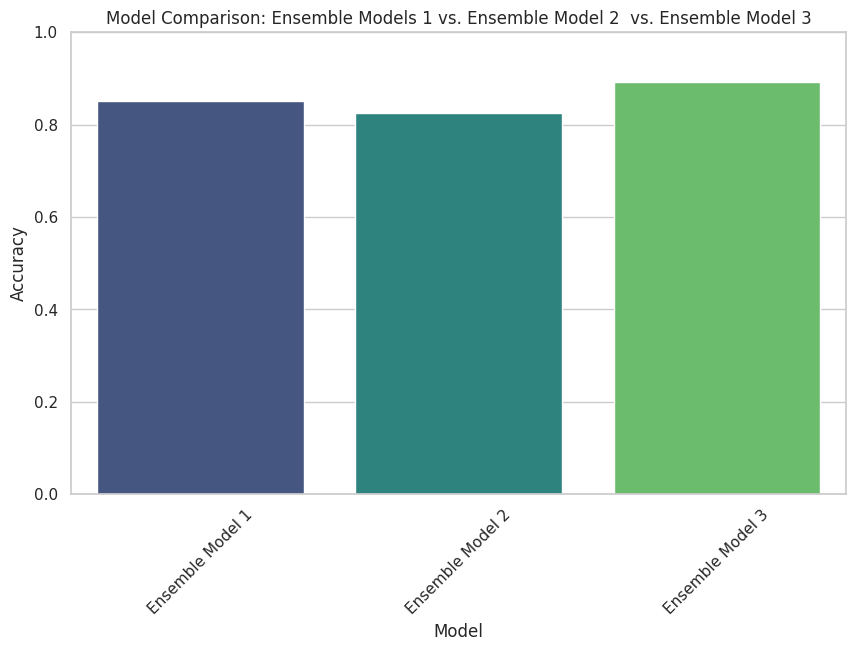

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define model names for the ensemble models
ensemble_model_names = ['Ensemble Model 1', 'Ensemble Model 2', 'Ensemble Model 3']

# Define accuracy scores for the ensemble models
ensemble_accuracies = [
    accuracy_score(y_test, y_pred_ensemble1),
    accuracy_score(y_test, y_pred_ensemble2),
    accuracy_score(y_test, y_pred_ensemble3)
]

# Combine model names and accuracies
models = ensemble_model_names + models[:3]  # Selecting only the first three models for comparison
accuracies = ensemble_accuracies + accuracies[:3]  # Selecting only the first three accuracies for comparison

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette="viridis", dodge=False, legend=False)
plt.title('Model Comparison: Ensemble Models 1 vs. Ensemble Model 2  vs. Ensemble Model 3')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Set the y-axis limit between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


## Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions on the test data
y_pred_ensemble1 = ensemble_model.predict(X_test)

# Calculate accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble1)

# Confusion matrix
confusion_ensemble = confusion_matrix(y_test, y_pred_ensemble1)

# Classification report
classification_rep_ensemble = classification_report(y_test, y_pred_ensemble1)

# Print the evaluation results
print("Accuracy:", accuracy_ensemble)
print("Confusion Matrix:\n", confusion_ensemble)
print("Classification Report:\n", classification_rep_ensemble)


Accuracy: 0.8505154639175257
Confusion Matrix:
 [[81  9]
 [20 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        90
           1       0.90      0.81      0.85       104

    accuracy                           0.85       194
   macro avg       0.85      0.85      0.85       194
weighted avg       0.86      0.85      0.85       194



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediction of the test variable
y_pred_ensemble2 = ensemble.predict(X_test)

# Evaluate the model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble2)
confusion_ensemble = confusion_matrix(y_test, y_pred_ensemble2)
classification_rep_ensemble = classification_report(y_test, y_pred_ensemble2)

# Print the evaluation results
print(f"Accuracy: {accuracy_ensemble}")
print("Confusion Matrix:\n", confusion_ensemble)
print("Classification Report:\n", classification_rep_ensemble)


Accuracy: 0.8917525773195877
Confusion Matrix:
 [[87  3]
 [18 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89        90
           1       0.97      0.83      0.89       104

    accuracy                           0.89       194
   macro avg       0.90      0.90      0.89       194
weighted avg       0.90      0.89      0.89       194



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict using the ensemble model
y_pred_ensemble3 = ensemble.predict(X_test)

# Calculate accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble3)
print("Accuracy:", accuracy_ensemble)

# Generate confusion matrix
confusion_ensemble = confusion_matrix(y_test, y_pred_ensemble3)
print("Confusion Matrix:\n", confusion_ensemble)

# Generate classification report
classification_rep_ensemble = classification_report(y_test, y_pred_ensemble3)
print("Classification Report:\n", classification_rep_ensemble)


Accuracy: 0.8917525773195877
Confusion Matrix:
 [[87  3]
 [18 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89        90
           1       0.97      0.83      0.89       104

    accuracy                           0.89       194
   macro avg       0.90      0.90      0.89       194
weighted avg       0.90      0.89      0.89       194



## Result


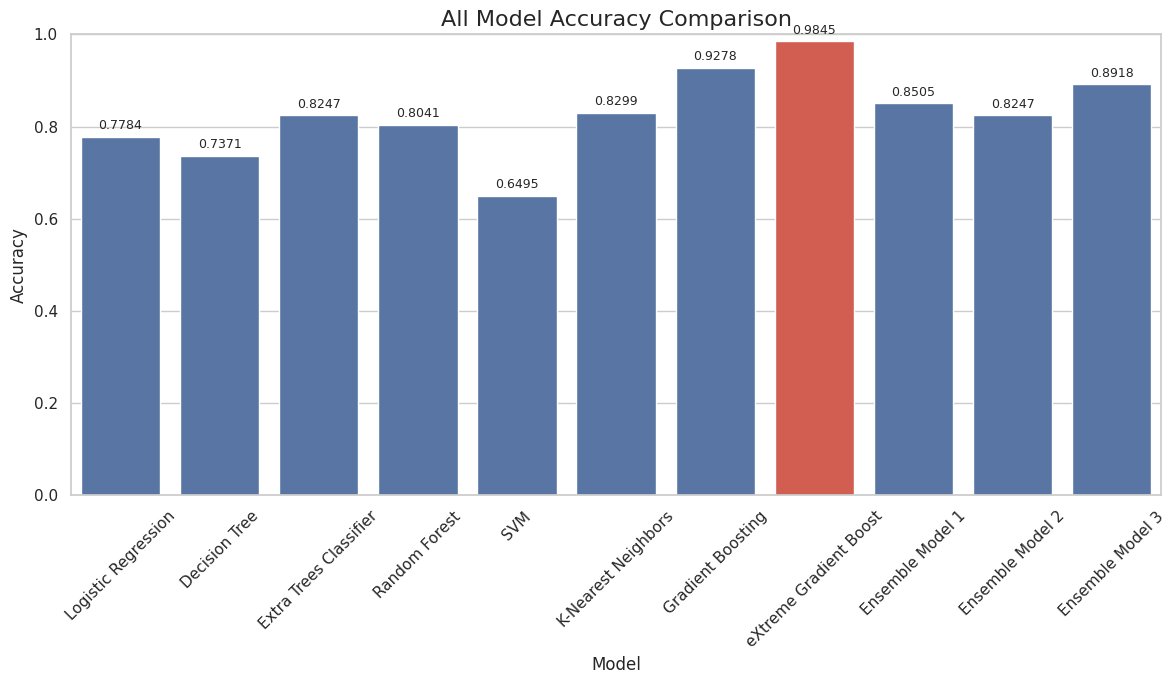

🏆 Best Performing Model: eXtreme Gradient Boost with Accuracy: 0.9845


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

# === Define All Model Names ===
base_models = [
    'Logistic Regression', 'Decision Tree', 'Extra Trees Classifier', 'Random Forest',
    'SVM', 'K-Nearest Neighbors', 'Gradient Boosting', 'eXtreme Gradient Boost'
]

ensemble_models = [
    'Ensemble Model 1', 'Ensemble Model 2', 'Ensemble Model 3'
]

# === Define All Model Accuracies ===
base_accuracies = [
    0.778351,  # Logistic Regression
    0.737113,  # Decision Tree
    0.824742,  # Extra Trees
    0.804124,  # Random Forest
    0.649485,  # SVM
    0.829897,  # KNN
    0.927835,  # Gradient Boosting
    0.984536   # XGBoost
]

ensemble_accuracies = [
    0.850515,  # Ensemble Model 1
    0.824742,  # Ensemble Model 2
    0.891753   # Ensemble Model 3
]

# === Combine Both Lists ===
models = base_models + ensemble_models
accuracies = base_accuracies + ensemble_accuracies

# === Create a DataFrame for Easy Plotting ===
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# === Identify Best Model ===
best_index = results_df['Accuracy'].idxmax()
best_model = results_df.loc[best_index, 'Model']
best_accuracy = results_df.loc[best_index, 'Accuracy']

# === Color Setup: Highlight the Best Model ===
colors = ['#4c72b0' if i != best_index else '#e74c3c' for i in range(len(results_df))]

# === Plotting the Bar Chart ===
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Accuracy', data=results_df, hue='Model', palette=colors, legend=False)

# Title and Labels
plt.title('All Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)

# Show accuracy values on each bar
for i, acc in enumerate(results_df['Accuracy']):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# === Print Best Model Info ===
print(f"🏆 Best Performing Model: {best_model} with Accuracy: {best_accuracy:.4f}")






**ROC AUC CURVE & Learning Curve**

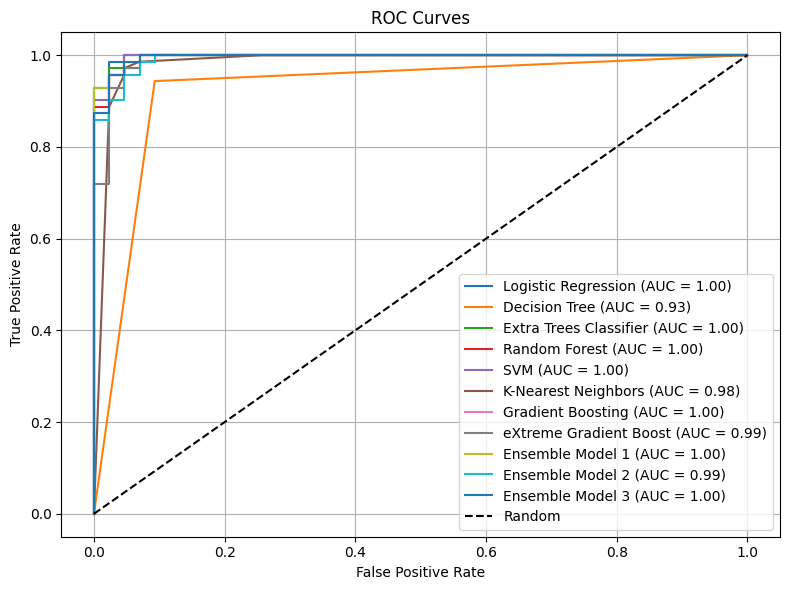

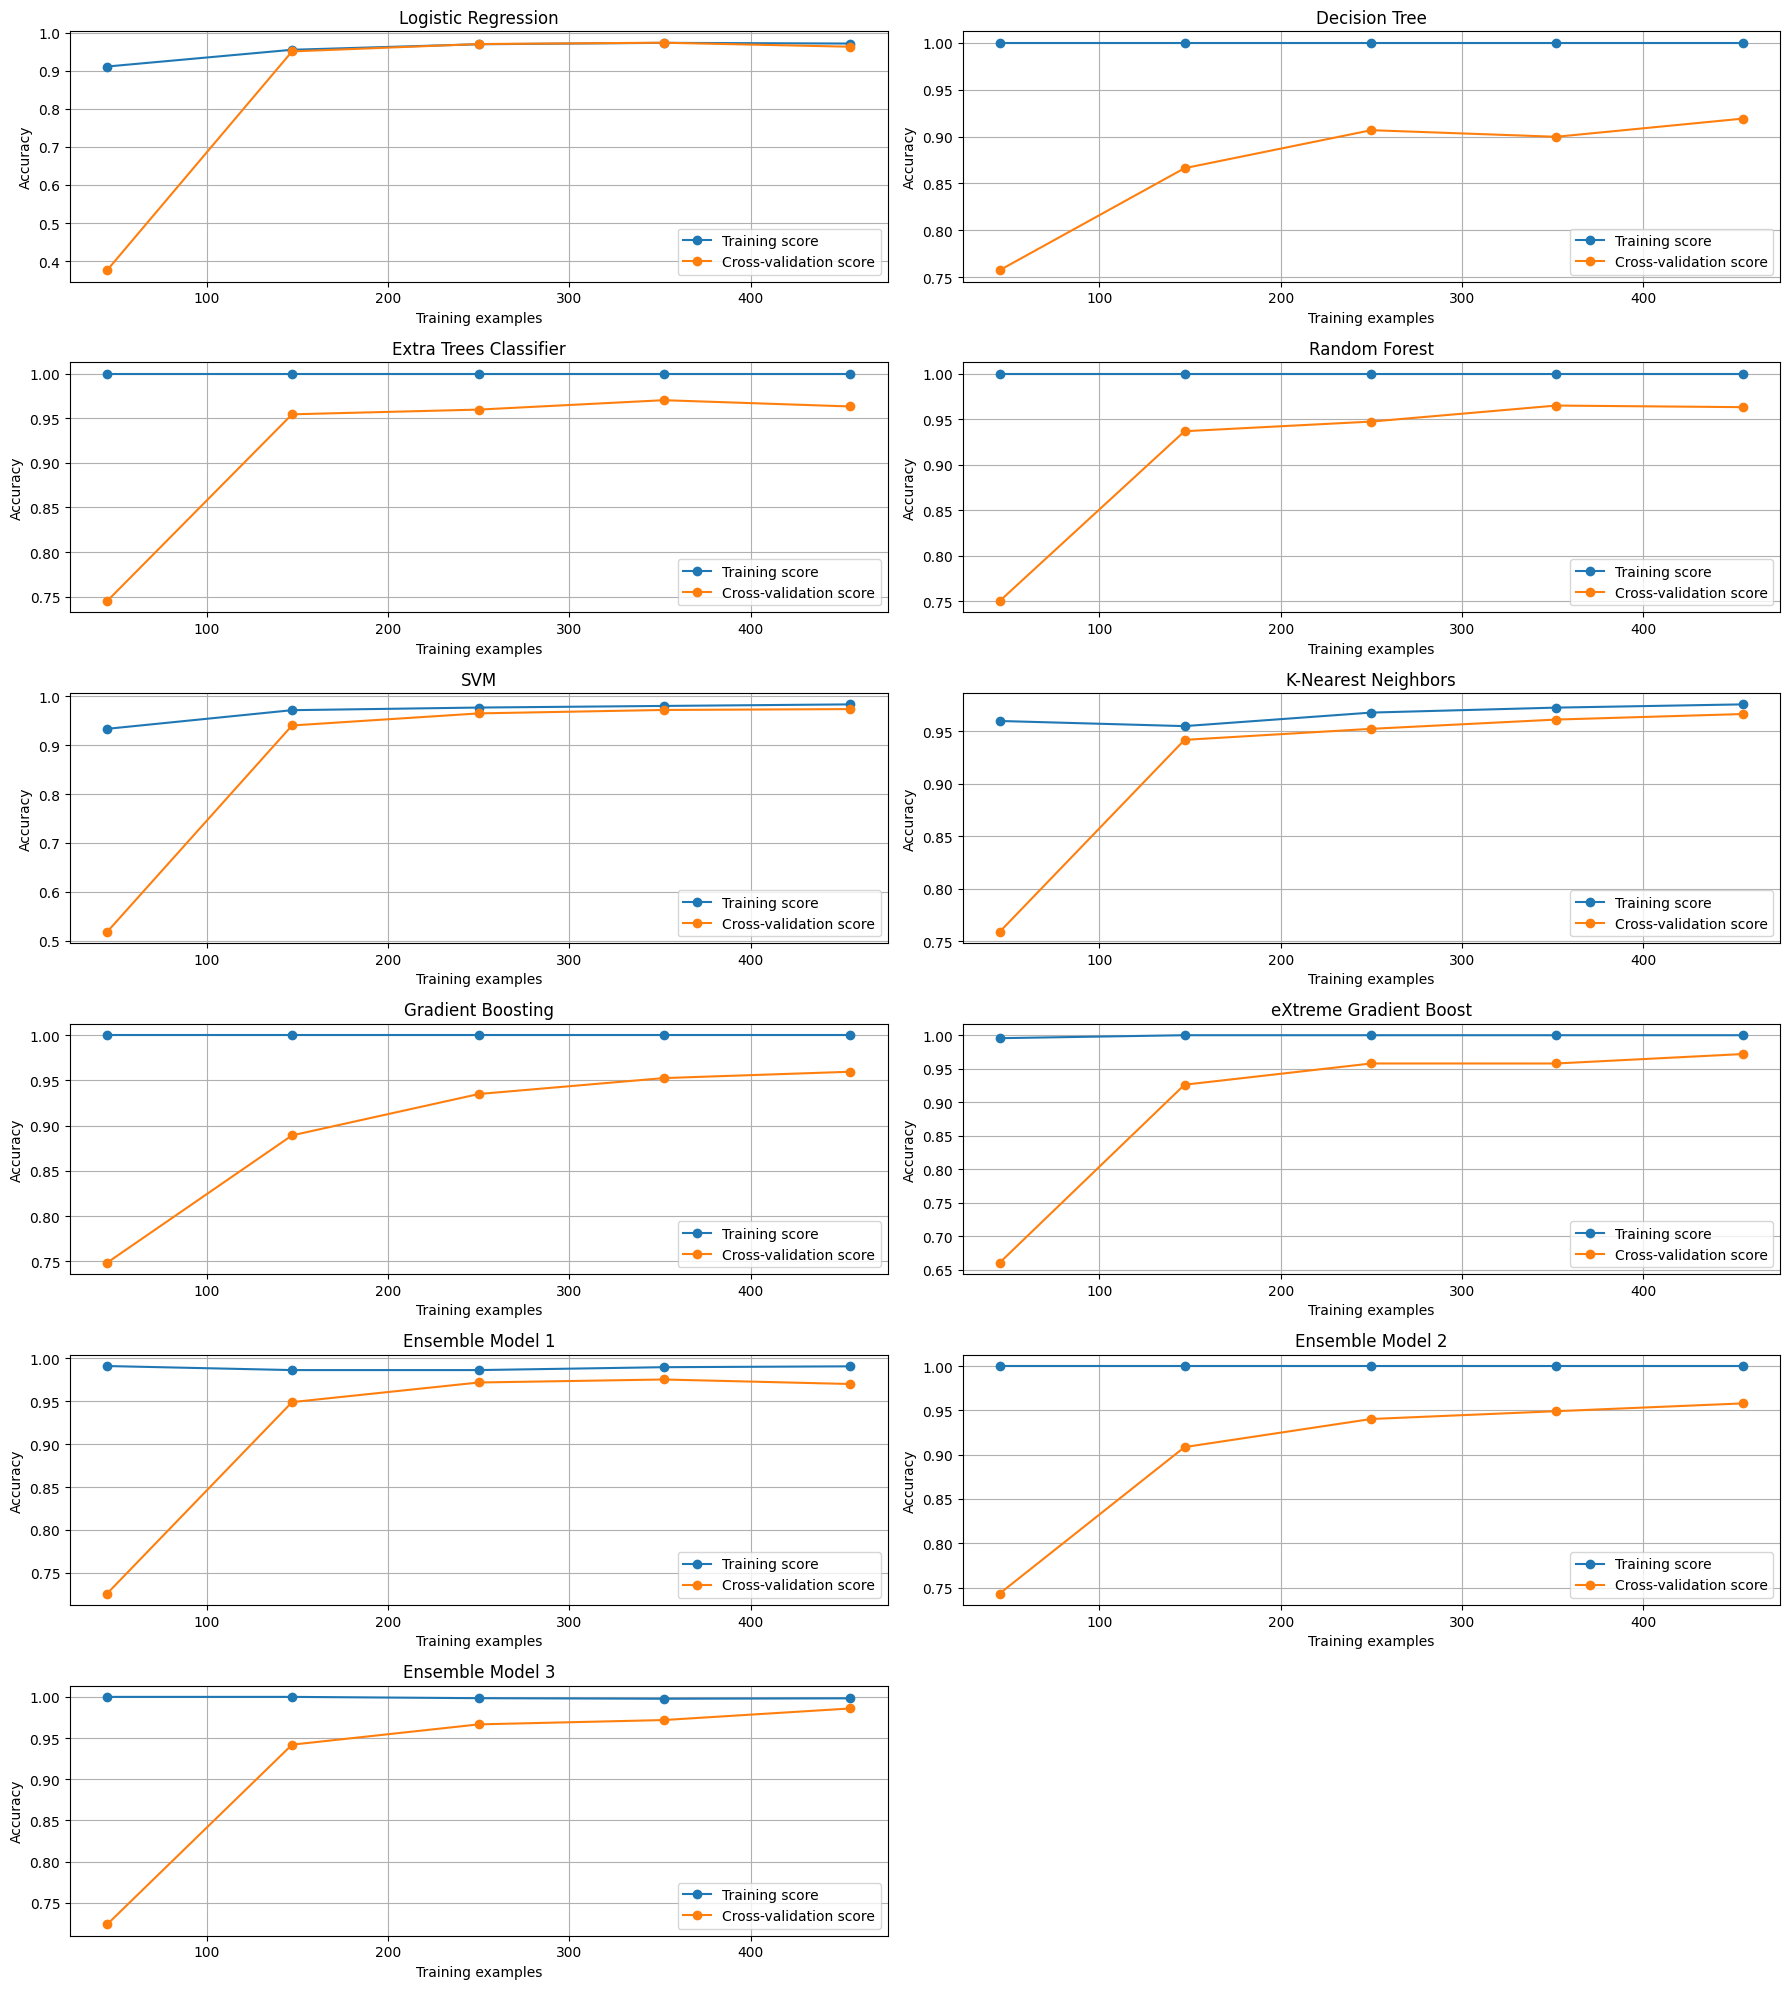

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")  # to suppress convergence warnings


# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='saga'),
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "eXtreme Gradient Boost": XGBClassifier(eval_metric='logloss'),
    "Ensemble Model 1": VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000, solver='saga')),
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))], voting='soft'),
    "Ensemble Model 2": VotingClassifier(estimators=[
        ('dt', DecisionTreeClassifier()),
        ('knn', KNeighborsClassifier()),
        ('gb', GradientBoostingClassifier())], voting='soft'),
    "Ensemble Model 3": VotingClassifier(estimators=[
        ('xgb', XGBClassifier(eval_metric='logloss')),
        ('ada', AdaBoostClassifier()),
        ('mlp', MLPClassifier(max_iter=500))], voting='soft')
}

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    probs = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot learning curves for each classifier
plt.figure(figsize=(18, 20))
for i, (name, clf) in enumerate(classifiers.items(), 1):
    plt.subplot(6, 2, i)
    train_sizes, train_scores, test_scores = learning_curve(clf, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
    plt.title(name)
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(loc='best')
plt.tight_layout()
plt.show()

